### Lesson 7


# Constrained Portfolio Optimization 

![](Lesson7GoalHeaderImage.png)

## 7.1 Introduction

Let us consider an investor who desires to invest in a portfolio of assets with the following objectives:  

(1) maximize expected portfolio return, and   
(2) minimize portfolio risk.  

However, the moderately risk averse investor decides to impose the following preferences and conditions on the investment:  

(3) Choose a mix of **High Volatility** and **Low Volatility** stocks based on the **betas** of the assets in the stock universe. The investor thereby wishes to invest in the two **asset classes** of *High Volatility* and *Low Volatility* stocks,  spread across any sector. To recall,  assets with betas greater than 1 are highly volatile stocks and those which are less than 1 are low volatile stocks. (Refer **Lesson 1 Fundamentals of Risk and Return of a Portfolio** to know more about betas of assets). The intention behind the investor's choice for high volatility assets is just that stock market volatility,  which can up investment risk, can also throw open avenues to earn superior returns on the investment.      

(4) Exercise caution over the inclusion of high volatility stocks by ensuring that only 40% of the  capital is invested in these  stocks, with the larger balance of  60% invested in low volatility stocks.  

(5) Having decided on the asset classes, ensure that a minimal  amount of 1% (at least) of the capital,  must be invested in the two classes. 

(6) Some assets if need be may not be invested in,  in other words, the lower bounds for the weights could be zero ($W_i \ge 0$).   

(7) Impose a ceiling on the amount of capital allotted for individual high volatility and low volatility stocks. Thus while the weights of low volatility stocks can have an upper bound of 1 ($W_i \le 1$), those of  high volatility stocks cannot exceed 0.1 ($W_i \le 0.1$), which means that only a maximum of 10% of the capital can be invested in each of the high volatility assets.    

(8) Ensure a  fully invested portfolio, where the entire capital is invested in the assets of the portfolio.  
  
The investor seems to be asking for the moon! - doesn't she? Let's explore.

## 7.2 Portfolio Optimization Model

The objectives, preferences and conditions laid down by the investor on the portfolio concerned, defines what is generally termed as a **Constrained Portfolio Optimization** model.   
Objectives (1) and (2) described above,  define the **objective functions** of the portfolio optimization model. The model is therefore a **two-objective non-linear optimization model**.   


The investor preferences and conditions described in points (3) - (7) define the **constraints** of the optimization model.   


Preference (3) and conditions (4) and (5), described above,  together define what is known as  **class constraint** in portfolio optimization theory.  
Class constraints  or group constraints denote situations when assets belonging to a specific sector or asset class,  have bounds imposed on their respective *sum of weights*, (i.e.) $ \epsilon \le \sum {W_i} \le \delta$, where 
${i\in Asset Class A}$  
Therefore, there are two class constraints imposed on the portfolio where the sum of weights of the stocks in the asset classes of High Volatility and Low Volatility are bound by 1% of the capital  at the lower end and 40% and 60% of the capital at the higher end, respectively.   
  
  
Conditions (6) and (7) together define what are referred to as **bound constraints**, in portfolio optimization theory.   
    
**Bound constraints** define the specific upper and lower bounds imposed on the weights of the assets, (i.e.) $\epsilon_i \le W_i \le\delta_i$.   
The investor has opted for zero lower bounds for all stocks in the portfolio,  with the upper bounds of 0.1 and 1 for the high volatility and low volatility stocks respectively.  
  
  
Condition (8) only means that the investor desires to  invest the entire capital in the portfolio, which means that the sum of weights of the portfolio should equal  1.  



The mathematical formulation of the model is as shown below.  


Let P be a portfolio comprising assets $A_1, A_2, ...A_N$ with weights $W_1, W_2, ...W_N$   asset returns $\mu_1, \mu_2, ...\mu_N$ and variance-covariance matrix of returns $\sigma_{i,j}$ .  Let $HighVolatility$ and $LowVolatility$ denote the asset classes of high volatility and low volatility stocks selected by the investor, based on their betas. (See **Lesson 1 Fundamentals of Risk and Return of a Portfolio** to know about portfolio risk,  return and computation of asset betas).    



Of the two objective functions, minimizing the variance of the portfolio is tantamount to minimizing its risk and hence the objective function in the model has been defined accordingly. 

![](Lesson7Eqn7_1.png)
<h5 align="right">..........(7.1)</h5>


Solving the portfolio optimization model defined by (7.1) obtains the optimal weights which  yields maximum return for a corresponding minimal risk, adhering to all  the investor preferential constraints imposed on the portfolio. 

## 7.3 Case Study

Let us suppose that an investor decides to follow this constrained portfolio optimization model to invest in a  $k$-portfolio of Dow stocks listed below ($k$-portfolio 1, for example). Refer **Lesson 3 Heuristic Portfolio Selection** to know more about $k$ portfolios and Sec. 3.5 to know about $k$-portfolio 1.   
  
**$k$-portfolio 1**:  

{Coca-Cola (KO), United Health (UNH), Walt Disney (DIS), IBM (IBM), Cisco (CSCO), JPMorgan Chase (JPM), Goldman Sachs (GS), Walgreens Boots Alliance (WBA), Apple (AAPL), Home Depot (HD), American Express (AXP), McDonald's (MCD), Merck (MRK), Boeing (BA), Caterpillar (CAT)}     


### Identification of High Volatility  and Low Volatility Assets

The first step is to identify the stocks belonging to the asset classes of *High Volatility* and *Low Volatility*,  by computing the asset betas.   
  
The asset betas are computed as  $\beta = \frac{ cov(r_i, r_P)} { var(r_P)}$  where $cov(r_i, r_P)$ is the covariance of the rate of return $r_i$  of the asset $i$ in a portfolio P and $r_P$,  the rate of return of the portfolio P. $var(r_P)$ is the variance of the rate of return $r_P$ of the portfolio P. In practice, the portfolio return $r_P$ is replaced by the market index return as explained in Sec. 1.3. of **Lesson 1 Fundamentals of  Risk and Return of a Portfolio**.   
  
The asset betas  are obtained over a 3-year historical period (DJIA Index: April 2016 - April 2019).   

To compute the asset betas, the asset returns and the market returns need to be readied. The Python function **StockReturnsComputing** doubles up  to compute both asset returns and market returns.   

In [8]:
# function computes asset returns 
def StockReturnsComputing(StockPrice, Rows, Columns):
    
    import numpy as np
    
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):        # j: Assets
        for i in range(Rows-1):     # i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])*100

    return StockReturn

The Python program shown below,  reads the 3-Year stock price dataset for $k$-portfolio 1 and the market dataset for the corresponding period, computes the respective returns and  the asset betas for the $k$-portfolio 1. 

In [9]:
#compute stock returns for k-portfolio 1 and market returns to compute asset betas

#Dependencies
import numpy as np
import pandas as pd


#input k portfolio 1 dataset  comprising 15 Dow stocks and DJIA market dataset 
#over a 3 Year period (April 2016 to April 2019)
stockFileName = 'DJIAkpf1Apr2016to20193YBeta.csv'
marketFileName = 'DJIAMarketDataApr2016to20193YBeta.csv'
stockRows = 756    #excluding header of stock dataset 
stockColumns = 15  #excluding date of stock dataset 
marketRows = 756   #excluding header of market dataset
marketColumns = 7  #excluding date of market dataset

#read stock prices and closing prices of market data (column index 4),  into dataframes
dfStock = pd.read_csv(stockFileName,  nrows= stockRows)
dfMarket = pd.read_csv(marketFileName, nrows = marketRows)
stockData = dfStock.iloc[0:, 1:]
marketData = dfMarket.iloc[0:, [4]] 

#extract asset labels in the portfolio
assetLabels = dfStock.columns[1:stockColumns+1].tolist()
print('Asset labels of k-portfolio 1: \n', assetLabels)

#compute asset returns
arStockPrices = np.asarray(stockData)
[sRows, sCols]=arStockPrices.shape
arStockReturns = StockReturnsComputing(arStockPrices, sRows, sCols)

#compute market returns
arMarketPrices = np.asarray(marketData)
[mRows, mCols]=arMarketPrices.shape
arMarketReturns = StockReturnsComputing(arMarketPrices, mRows, mCols)


Asset labels of k-portfolio 1: 
 ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'DIS', 'GS', 'HD', 'IBM', 'JPM', 'KO', 'MCD', 'MRK', 'UNH', 'WBA']


The market returns **arMarketReturns** and stock returns  **arStockReturns** for $k$-portfolio 1 are used to obtain the asset betas. 

In [10]:
#compute betas of the assets in k-portfolio 1
beta= []
Var = np.var(arMarketReturns, ddof =1)
for i in range(stockColumns):
    CovarMat = np.cov(arMarketReturns[:,0], arStockReturns[:, i ])
    Covar  = CovarMat[1,0]
    beta.append(Covar/Var)


#display results
print('Asset Betas:\n')
for data in beta:
    print('{:9.3f}'.format(data))

Asset Betas:

    1.134
    1.087
    1.392
    1.527
    1.154
    0.767
    1.317
    0.937
    0.976
    1.115
    0.460
    0.554
    0.735
    0.950
    0.850


From the output, it can be gathered that $k$-portfolio 1 has the following asset betas:  
  
['AAPL': 1.134], ['AXP': 1.087], ['BA': 1.392], ['CAT': 1.527], ['CSCO': 1.154], ['DIS': 0.767], ['GS': 1.317],  ['HD': 0.937], ['IBM': 0.976], ['JPM': 1.115], ['KO': 0.460], ['MCD': 0.554], ['MRK': 0.735], ['UNH': 0.950], ['WBA': 0.850]  

Choosing those stocks with $\beta >1$ as high volatility stocks and the rest as low volatility stocks, the asset classes obtained are:  

Asset class *HighVolatility* : { 'AAPL', 'AXP', 'BA',  'CAT',  'CSCO', 'GS', 'JPM']  
Asset class *LowVolatility*  : {'DIS',  'HD',  'IBM',  'KO',  'MCD',  'MRK',  'UNH',  'WBA'}


### Transformation of bi-criterion objective function into single-criterion function

The optimization model described by (7.1) holds two objective functions of maximizing return and minimizing risk. Though there are methods available in the literature to tackle Multi-objective optimization problems, a time-tested approach is to tranform the multi-objective functions into a single-criterion function.    

Known as **linear scalarization**, the tranformation function is a **weighted** formulation of the two objective functions as shown below. In the context of Portfolio Optimization theory, $\lambda$ is referred to as **risk-aversion parameter*.
  

 
![](Lesson7Eqn7_2.png)
<h5 align="right">..........(7.2)</h5>


The risk aversion parameter $\lambda$ varies between [0,1]. Thus, when $\lambda = 0$, the single-criterion function becomes $min\left( - \sum{W_i.\mu_i} \right)$ which is equivalent to maximizing return and when $\lambda = 1$, the single-criterion function becomes $min\left( {\sum\sum\ {W_i.W_j.\sigma_{ij}}} \right)$ which is tantamount to minimizing the portfolio  risk. For all other values of $\lambda$, solving the portfolio optimization model for each value of $\lambda$,  yields a collection of optimal portfolio sets that forms the efficient set of the portfolio. The risk return couples of these efficient sets will trace the corresponding **efficient frontier** for the portfolio. (See **Lesson 5 Mean-Variance Optimization of Portfolios** to know about efficient frontier). 

The transformed single-criterion constrained optimization model is defined as, 

![](Lesson7Eqn7_3.png)
<h5 align="right">..........(7.3)</h5>


### Obtaining Optimal Constrained Portfolios

Having determined the asset classes of *HighVolatility* and *LowVolatility* based on the 3-Year asset betas, we now proceed to demonstrate the execution of the single-criterion constrained optimization model described by (7.3), using a Python program.  
The historical dataset (DJIA Index: April 2014-April 2019), is used to obtain the mean returns and the variance-covariance matrix of returns of $k$-portfolio 1.   
The following Python code demonstrates the same. 

In [11]:
#obtain mean returns and variance-covariance matrix of returns of k-portfolio 1
#historical dataset: DJIA Index April 2014 to April 2019

#Dependencies
import numpy as np
import pandas as pd

#input k portfolio 1 dataset comprising 15 Dow stocks
StockFileName = 'DJIA_Apr112014_Apr112019_kpf1.csv'
Rows = 1259  #excluding header
Columns = 15  #excluding date

#read stock prices 
df = pd.read_csv(StockFileName,  nrows= Rows)

#extract asset labels
assetLabels = df.columns[1:Columns+1].tolist()
print('Asset labels for k-portfolio 1: \n', assetLabels)

#extract the asset prices data
stockData = df.iloc[0:, 1:]

#compute asset returns
arStockPrices = np.asarray(stockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#set precision for printing data
np.set_printoptions(precision=3, suppress = True)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
print('\nMean Returns:\n', meanReturns)
print('\nVariance-Covariance Matrix of Returns:\n', covReturns)



Asset labels for k-portfolio 1: 
 ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'DIS', 'GS', 'HD', 'IBM', 'JPM', 'KO', 'MCD', 'MRK', 'UNH', 'WBA']

Mean Returns:
 [ 0.09   0.029  0.1    0.039  0.081  0.04   0.033  0.085 -0.016  0.06
  0.019  0.057  0.036  0.095 -0.002]

Variance-Covariance Matrix of Returns:
 [[2.375 0.672 0.962 1.042 0.999 0.68  0.954 0.726 0.709 0.825 0.306 0.458
  0.534 0.774 0.697]
 [0.672 1.648 0.8   0.95  0.7   0.569 1.065 0.658 0.663 1.001 0.307 0.35
  0.556 0.718 0.667]
 [0.962 0.8   2.288 1.31  0.89  0.716 1.066 0.747 0.777 0.977 0.381 0.472
  0.578 0.745 0.679]
 [1.042 0.95  1.31  2.733 1.041 0.688 1.321 0.796 0.885 1.169 0.358 0.455
  0.616 0.72  0.681]
 [0.999 0.7   0.89  1.041 1.789 0.713 0.927 0.724 0.817 0.909 0.362 0.477
  0.647 0.656 0.707]
 [0.68  0.569 0.716 0.688 0.713 1.35  0.773 0.586 0.574 0.717 0.302 0.368
  0.466 0.557 0.631]
 [0.954 1.065 1.066 1.321 0.927 0.773 2.114 0.795 0.803 1.554 0.303 0.467
  0.705 0.82  0.819]
 [0.726 0.658 0.747 0.796 0.724 0.

The function **BiCriterionFunctionOptmzn** handles the objective function, equality constraint and class constraints described in (7.3). Thus, it   defines the single-criterion objective function of (7.3) as <b>f</b>, where  **RiskAversParam** denotes parameter $\lambda$. Function  **ConstraintEq** defines the fully invested portfolio constraint which ensures that the sum of weights equals 1. Function **ConstraintIneqUpBounds** defines the upper bounds of the class constraints with regard to *HighVolatility* and *LowVolatility* asset classes as 0.4 and 0.6 respectively.  Function **ConstraintIneqLowBounds** defines the lower bounds of the class constraints with regard to *HighVolatility* and *LowVolatility* asset classes as 0.01 for both. **bnds** inputs the respective lower and upper bounds of the high volatility and low volatility assets in the portfolio.  

The **optimize.minimize** function from **scipy.optimize** package undertakes the constrained optimization of the portfolio. 


In [12]:
#function to handle bi-criterion portfolio optimization with constraints

#dependencies
import numpy as np
from scipy import optimize 

def BiCriterionFunctionOptmzn(MeanReturns, CovarReturns, RiskAversParam, PortfolioSize):
       
    def  f(x, MeanReturns, CovarReturns, RiskAversParam, PortfolioSize):
        PortfolioVariance = np.matmul(np.matmul(x, CovarReturns), x.T) 
        PortfolioExpReturn = np.matmul(np.array(MeanReturns),x.T)
        func = RiskAversParam * PortfolioVariance - (1-RiskAversParam)*PortfolioExpReturn
        return func

    def ConstraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b 
        return constraintVal
    
    def ConstraintIneqUpBounds(x):
        A= [[0,0,0,0,0, 1,0,1,1,0, 1,1,1,1,1], [1,1,1,1,1,0,1,0,0,1,0,0,0,0,0]]
        bUpBounds =np.array([0.6,0.4]).T
        constraintValUpBounds = bUpBounds-np.matmul(A,x.T) 
        return constraintValUpBounds

    def ConstraintIneqLowBounds(x):
        A= [[0,0,0,0,0,1,0,1,1,0, 1,1,1,1,1], [1,1,1,1,1,0,1,0,0,1,0,0,0,0,0]]
        bLowBounds =np.array([0.01, 0.01]).T
        constraintValLowBounds = np.matmul(A,x.T)-bLowBounds  
        return constraintValLowBounds
    
    xinit=np.repeat(0.01, PortfolioSize)
    cons = ({'type': 'eq', 'fun':ConstraintEq}, \
            {'type':'ineq', 'fun': ConstraintIneqUpBounds},\
            {'type':'ineq', 'fun': ConstraintIneqLowBounds})
    bnds = [(0,0.1),(0,0.1), (0,0.1), (0,0.1), (0,0.1), (0,1), (0,0.1), (0,1),\
            (0,1), (0,0.1), (0,1),  (0,1),(0,1),(0,1),(0,1)]

    opt = optimize.minimize (f, x0 = xinit, args = ( MeanReturns, CovarReturns,\
                                                    RiskAversParam, PortfolioSize), \
                             method = 'SLSQP',  bounds = bnds, constraints = cons, \
                             tol = 10**-3)
    print(opt)
    return opt



The main Python program to optimize the constrained portfolio optimization model described in (7.3) is shown below. **riskAversParam** is allowed to vary between [0,1] to generate $m$ points and for each one of these values  (7.3) is repeatedly  solved using the function **BiCriterionFunctionOptmzn** to arrive at the optimal weights. $m$ can be chosen to be any positive integer that will eventually help to graph the efficient frontier clearly using the optimal risk-return couples of the efficient set.  
  
  
This demonstration makes use of $m$ = 60.  **xOptimalArray** therefore, represents an array of 60 optimal weight sets. Arrays **riskPoint** and **retPoint** represent the annualized risk and return of the corresponding optimal portfolio sets generated. 

In [13]:
#obtain optimal portfolios for the constrained portfolio optimization model
#Maximize returns and Minimize risk with fully invested, bound and 
#class constraints

#set portfolio size 
portfolioSize = Columns

#initialization
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]

for points in range(0,60):
    riskAversParam = points/60.0
    result = BiCriterionFunctionOptmzn(meanReturns, covReturns, riskAversParam, \
                                       portfolioSize)
    xOptimal.append(result.x)

#compute annualized risk and return  of the optimal portfolios for trading days = 251  
xOptimalArray = np.array(xOptimal)
minRiskPoint = np.diagonal(np.matmul((np.matmul(xOptimalArray,covReturns)),\
                                     np.transpose(xOptimalArray)))
riskPoint =   np.sqrt(minRiskPoint*251) 
expPortfolioReturnPoint= np.matmul(xOptimalArray, meanReturns )
retPoint = 251*np.array(expPortfolioReturnPoint) 

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display optimal portfolio results
print("Optimal weights of the efficient set portfolios\n:", xOptimalArray)
print("\nAnnualized Risk and Return of the efficient set portfolios:\n",\
      np.c_[riskPoint, retPoint])


     fun: -0.08718146559177359
     jac: array([-0.09 , -0.029, -0.1  , -0.039, -0.081, -0.04 , -0.033, -0.085,
        0.016, -0.06 , -0.019, -0.057, -0.036, -0.095,  0.002])
 message: 'Optimization terminated successfully.'
    nfev: 102
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.1  , 0.   , 0.1  , 0.   , 0.1  , 0.   , 0.   , 0.248, 0.   ,
       0.1  , 0.   , 0.015, 0.   , 0.337, 0.   ])
     fun: -0.06831630619617497
     jac: array([-0.058, -0.005, -0.067, -0.009, -0.051, -0.019, -0.003, -0.056,
        0.037, -0.03 , -0.008, -0.038, -0.016, -0.062,  0.025])
 message: 'Optimization terminated successfully.'
    nfev: 85
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.1  , 0.   , 0.1  , 0.   , 0.1  , 0.   , 0.   , 0.224, 0.   ,
       0.1  , 0.   , 0.101, 0.   , 0.274, 0.   ])
     fun: -0.05228217951286127
     jac: array([-0.025,  0.018, -0.035,  0.021, -0.022,  0.001,  0.027, -0.027,
        0.058, -0.001,  0.004, -0.019,  0.003, 

     fun: 0.25361840026577237
     jac: array([0.636, 0.585, 0.641, 0.654, 0.639, 0.479, 0.656, 0.485, 0.535,
       0.634, 0.459, 0.486, 0.485, 0.477, 0.519])
 message: 'Optimization terminated successfully.'
    nfev: 69
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.077, 0.1  , 0.059, 0.   , 0.096, 0.04 , 0.   , 0.011, 0.   ,
       0.068, 0.31 , 0.188, 0.036, 0.015, 0.   ])
     fun: 0.26393939984668585
     jac: array([0.659, 0.606, 0.664, 0.677, 0.662, 0.497, 0.679, 0.502, 0.552,
       0.658, 0.478, 0.504, 0.502, 0.495, 0.536])
 message: 'Optimization terminated successfully.'
    nfev: 69
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.077, 0.1  , 0.058, 0.   , 0.096, 0.041, 0.   , 0.008, 0.   ,
       0.07 , 0.314, 0.187, 0.036, 0.015, 0.   ])
     fun: 0.2742598564108039
     jac: array([0.681, 0.626, 0.688, 0.699, 0.685, 0.514, 0.702, 0.519, 0.569,
       0.681, 0.496, 0.522, 0.519, 0.513, 0.553])
 message: 'Optimization terminate

Tracing the efficient frontier using the risk-return couples represented by the arrays **riskPoint** and **retPoint** yields the following:

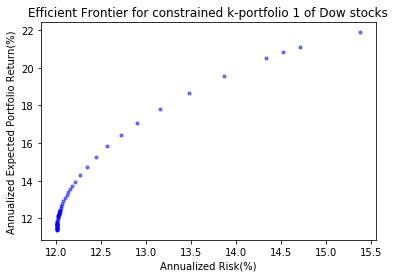

In [14]:
import matplotlib.pyplot as plt

#Graph Efficient Frontier for the constrained portfolio model
NoPoints = riskPoint.size

colours = "blue"
area = np.pi*3

plt.title('Efficient Frontier for constrained k-portfolio 1 of Dow stocks')
plt.xlabel('Annualized Risk(%)')
plt.ylabel('Annualized Expected Portfolio Return(%)' )
plt.scatter(riskPoint, retPoint, s=area, c=colours, alpha =0.5)
plt.show()


## 7.4  Interpretation of  Results

It can be observed that the risk-return couples for the constrained portfolio optimization model, during one of its runs,  runs through the points beginning at (12.002%, 11.4%), which represents the minimum risk portfolio, to end at  (15.375%, 21.883%) which represents the maximum expected portfolio return portfolio.   
The optimal weight set corresponding to the minimum-risk portfolio,  which possibly could be opted for by a risk averse investor  is,  
[0.078, 0.1, 0.044, 0.003, 0.091, 0.044, 0.009, 0, 0, 0.076, 0.368, 0.158, 0.03, 0, 0]. This weight set corresponding to $\lambda =1$, occupies the  last row of array variable **xOptimalArray**.   
The interpretation is, if the risk averse investor desires to hold such a constrained portfolio with the minimal annualized risk of 12.002%, then the investor can be assured of an annualized expected portfolio return of 11.4%. To accomplish this,  the capital allocation to various assets in the portfolio ($k$-portfolio 1, in fact) should be done in the following fashion, as dictated by the corresponding optimal weights:  

['AAPL': 7.8%], ['AXP': 10%], ['BA': 4.4%], ['CAT': 0.3%], ['CSCO': 9.1%], ['DIS': 4.4%], ['GS': 0.9%%],  ['HD': 0%], ['IBM': 0%], ['JPM': 7.6%], ['KO': 36.8%], ['MCD': 15.8%], ['MRK': 0.03%], ['UNH': 0%], ['WBA': 0%].   

It can be seen that all the constraints imposed  by the investor on the model are satisfied by the optimal solution.  
  
 - The sum of optimal weights equals 1 (100% capital allocation) verifying the fully invested nature of the portfolio which was one of the constraints imposed by the investor (condition 8).   
 - The capital allocations made to the asset classes of  *HighVolatility* : { 'AAPL', 'AXP', 'BA',  'CAT',  'CSCO', 'GS', 'JPM'} and  *LowVolatility*  : {'DIS',  'HD',  'IBM',  'KO',  'MCD',  'MRK',  'UNH',  'WBA'}, equal 40% and 60% of the capital,  satisfying the class constraints imposed by the investor (conditions 3-5).  
 - With regard to the bound constraints, the optimal weights of all assets belonging to the *HighVolatility* class do not exceed 0.1 (10% capital allocation) as desired by the investor. The zero weights accorded to the assets {'HD', 'IBM', 'UNH', 'WBA'} is perfectly fine considering the fact that the investor had set the weights of all assets to have zero lower bounds (conditions 6-7).    
  
  
A similar verification and interpretation of the results can be carried out for each of the optimal portfolios graphed by the efficient frontier.   

As already discussed in Sec. 5.4 of **Lesson 5 Mean-Variance Optimization of Portfolios**, the efficient frontier can be used by the investor to select an optimal portfolio with an  expected portfolio return of y%, given the investor's choice of  x% risk or vice-versa. It can be verified that the optimal portfolio weights satisfy all the constraints laid down by the investor and guarantees the desired risk - return of (x%, y%) as emphasized by the investor. 

### Companion Reading  

This blog  is an abridged adaptation of concepts discussed in Chapter 1 and Chapter 3 of [PAI 18] to Dow Jones dataset (DJIA index: April, 2014- April, 2019) and implemented in Python. Readers (read "worker bees"),  seeking more information may refer to the corresponding chapters in the  book.

<h3 align="left">References</h3>   
 
 
[PAI 18]   Vijayalakshmi Pai G. A., Metaheuristics for Portfolio Optimization- An Introduction using MATLAB, Wiley-ISTE, 2018. https://www.mathworks.com/academia/books/metaheuristics-for-portfolio-optimization-pai.html  


![](Lesson7ExitTailImage.png)